### Analísis sillas disponibles

Se presentan los datos de las sillas disponibles por parte de las aerolineas, durante los años 2019,2020,2021 y parte del 2022.  
Se prepende hacer un análisis del comportamiento de la serie de datos a través del tiempo, con el fin de detectar los comportamiento en el cambio de periodos

In [1]:
### importar librerías para el análisis de los datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
plt.style.use('fivethirtyeight')

In [2]:
# importar los datos del formato Excel
global_seat = pd.read_excel("seats.xlsx", sheet_name="weekly_global_seats")
global_seat.head()

,ID,DAY START,MONTH START,mesd1,YEAR START,START,DAY END,MONTH END,mesd2,YEAR END,END,Seats
0,1,31,diciembre,12,2018,2018-12-31,6,enero,1,2019,2019-01-06,104274298
1,2,7,enero,1,2019,2019-01-07,13,enero,1,2019,2019-01-13,103315460
2,3,14,enero,1,2019,2019-01-14,20,enero,1,2019,2019-01-20,104109839
3,4,21,enero,1,2019,2019-01-21,27,enero,1,2019,2019-01-27,104731256
4,5,28,enero,1,2019,2019-01-28,3,febrero,2,2019,2019-02-03,104540994


Observamos el nombre de las columnsas con las que cuenta los datos

In [3]:
global_seat.columns

Index(['ID', 'DAY START', 'MONTH START', 'mesd1', 'YEAR START', 'START',
       'DAY END', 'MONTH END', 'mesd2', 'YEAR END', 'END', 'Seats'],
      dtype='object')

Se eliminan las variables que no otorgan información al estudio

In [4]:
global_seat = global_seat.drop(columns=['ID','DAY START','MONTH START','mesd1','YEAR START','DAY END','MONTH END','mesd2','YEAR END'])
global_seat.head()

,START,END,Seats
0,2018-12-31,2019-01-06,104274298
1,2019-01-07,2019-01-13,103315460
2,2019-01-14,2019-01-20,104109839
3,2019-01-21,2019-01-27,104731256
4,2019-01-28,2019-02-03,104540994


### Análisis exploratorio de datos

Inicialmente se estimaran los estadisticos para así obtener un panorama general de los datos

In [5]:
global_seat.describe().astype(str)

,Seats
count,162.0
mean,80484174.07407407
std,25735832.30814999
min,30577575.0
25%,58468531.0
50%,78623429.5
75%,106661286.75
max,119123242.0


Se muestra una desviación estandar es menor que la media, es decir que demuestra que hay variabilidad pero no hay indicios de sesgos en los datos. muestra una media de 80484174 por todos los años, se propone mirar por año las estadisticas para tener un panorama más preciso de lo que se cuenta

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


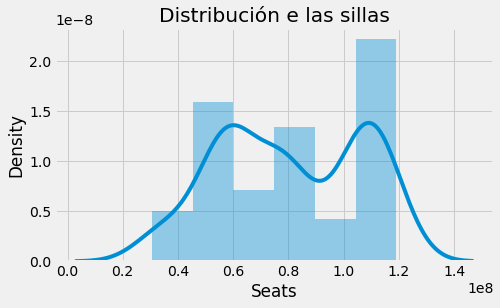

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


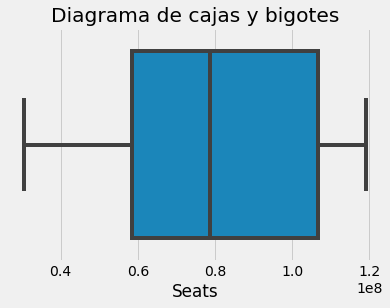

In [6]:
plt.figure(figsize=(7,4))
sns.distplot(global_seat.Seats)
plt.title("Distribución e las sillas")
plt.show()
sns.boxplot(global_seat.Seats)
plt.title("Diagrama de cajas y bigotes")
plt.show()

La distribución presente en la gráfica se asemeja a una distribución binomial , puede ser que como se esta estudiando un entorno global puede tener implicita dos distribuciones.  
El diagrama de cajas nos muestra que puede ser una curva asimetrica, sin embargo no cuenta con valores atipicos en el estudio.

#### Segmentación de los datos

**2019**

In [7]:
# Análisis de datos del 2019
n2019 = (global_seat[global_seat.END >='2019-01-01'])
n2019 = (n2019[n2019.END<='2019-12-31'])
n2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   START   52 non-null     datetime64[ns]
 1   END     52 non-null     datetime64[ns]
 2   Seats   52 non-null     int64         
dtypes: datetime64[ns](2), int64(1)
memory usage: 1.6 KB


In [8]:
n2019.describe().astype(str)

,Seats
count,52.0
mean,110716078.92307693
std,4876904.690020163
min,103315460.0
25%,106455362.25
50%,109788686.0
75%,114862436.75
max,119123242.0


Los asientos en promedio del año 2019 fueron 110.716.079 sillas, el promedio fue mayor en el 2019 ya que el estudio global toma pocos valores en el 2022 y variabilidades en los demás años que serán estudiadas.  
La desviación estandar es menor que la media lo cual no muestra sesgos en los datos presentes.

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


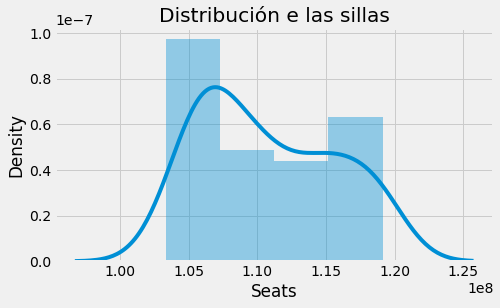

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


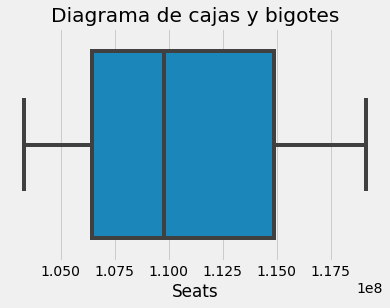

In [9]:
def figuras(data):
    plt.figure(figsize=(7,4))
    sns.distplot(data.Seats)
    plt.title("Distribución e las sillas")
    plt.show()
    sns.boxplot(data.Seats)
    plt.title("Diagrama de cajas y bigotes")
    plt.show()
figuras(n2019)

Vemos una distribución mas cercana, sin embargo hay un sesgo en el estudio de sillas, de igual forma los datos no contiene valores atípicos.

In [10]:
# Análisis de datos del 2019
n2020 = (global_seat[global_seat.END >='2020-01-01'])
n2020 = (n2020[n2020.END<='2020-12-31'])
n2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 52 to 102
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   START   51 non-null     datetime64[ns]
 1   END     51 non-null     datetime64[ns]
 2   Seats   51 non-null     int64         
dtypes: datetime64[ns](2), int64(1)
memory usage: 1.6 KB


In [11]:
n2020.describe().astype(str)

,Seats
count,51.0
mean,60888634.568627454
std,22876255.46267764
min,30577575.0
25%,48572930.0
50%,56942519.0
75%,60508010.5
max,107929252.0


La media de los asientos en el año 2020 fué de 60.888.634 que respecto al 2019 corresponde a un decremento del 45%, este pico puede deberse a la pandemia de la COVID 19. ya que el sector de transporte aereo fue gravemente afectado por la pandemia

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


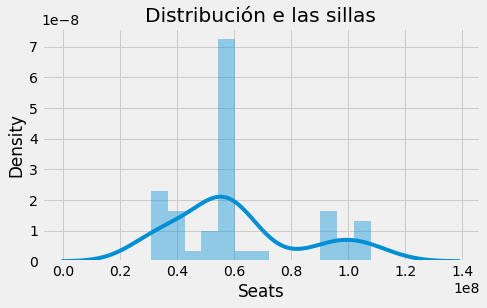

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


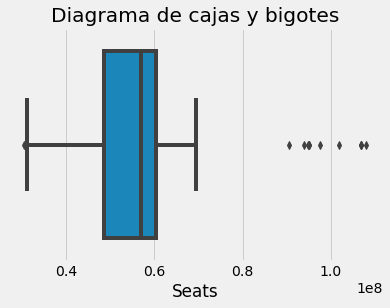

In [12]:
figuras(n2020)

los a los datos se les encuentra un cesgo tanto en la curva, a diferencia parece tener una curtosis platicurtica y cuenta con valores atipicos a la derecha

In [13]:
# Análisis de datos del 2021
n2021 = (global_seat[global_seat.END >='2021-01-01'])
n2021 = (n2021[n2021.END<='2021-12-31'])
n2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 103 to 154
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   START   52 non-null     datetime64[ns]
 1   END     52 non-null     datetime64[ns]
 2   Seats   52 non-null     int64         
dtypes: datetime64[ns](2), int64(1)
memory usage: 1.6 KB


In [14]:
n2021.describe().astype(str)

,Seats
count,52.0
mean,69645651.84615384
std,10737236.883510064
min,48157567.0
25%,61571699.75
50%,73905305.0
75%,78854291.75
max,85926652.0


la media para el año 2021 fue de 69.645.651 que respecto al año 2020 representa un aumento del 14%, esto puede sser por causas de la vacunación, que comienza a reactivar poco a poco el mercado

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


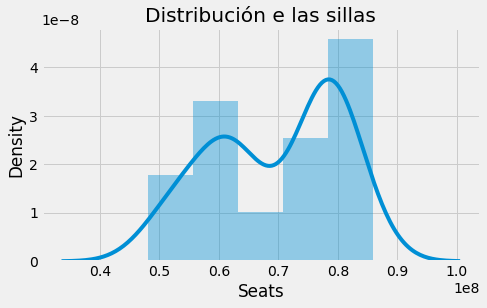

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


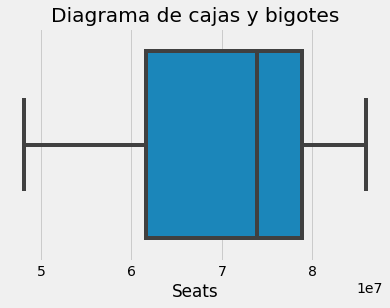

In [15]:
figuras(n2021)

se Observa un sego en la curva de distribución, sin embargo los datos no cuentan con valores atipicos

### Análisis de tendencias (Regresión lineal)

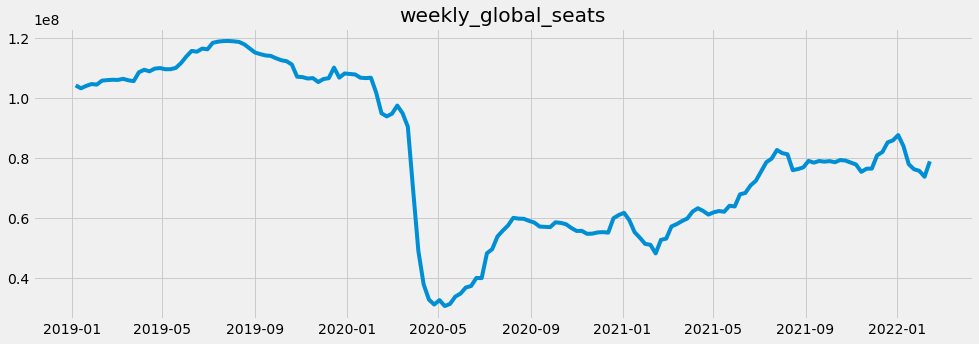

In [16]:
plt.figure(figsize = (15,5))
plt.plot(global_seat.END, global_seat.Seats)
plt.title('weekly_global_seats')
plt.show()

En la serie temporal se observa una fuerte caida en las sillas en el 2020, esto puede deberse al cierre que hubo debido a la pandemia.Sin embargo se observa un crecimeintoa parti de la fecha 2020-05

In [17]:
from sklearn.linear_model import LinearRegression

global_seat['fecha_numeros']=global_seat.END.map(datetime.datetime.toordinal)

lr = LinearRegression()
lr.fit(global_seat.fecha_numeros.values.reshape(-1, 1), global_seat.Seats)

LinearRegression()

Se elabora un modelo de regresión lineal con el fin de detectar tendenciaas en la curva general, para este análisis se propone análizar el crecimiento del sector, es decir la reactivación económica que ha tenido el sector

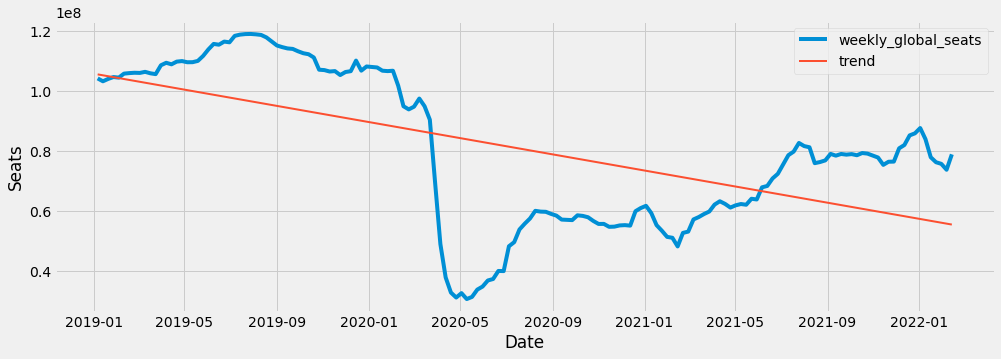

In [18]:
plt.figure(figsize = (15,5))
plt.plot(global_seat.END, global_seat.Seats, label = 'weekly_global_seats')
plt.plot(global_seat.END, lr.predict(global_seat.fecha_numeros.values.reshape(-1, 1)), lw = 2, label = 'trend')
plt.xlabel('Date')
plt.ylabel('Seats')
plt.legend()
plt.show()

In [19]:
print('pendiente de la regresión: ',lr.coef_)

pendiente de la regresión:  [-44234.47140226]


Por la pandemia se mestra una tendencia negativa de 44234, esto demuestra como la crisis sanitaria afecto a este preciso sector

In [20]:
crecimiento = global_seat[global_seat.END>='2020-05-01']

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_26336/2975306066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crecimiento['fecha_numeros']=crecimiento.END.map(datetime.datetime.toordinal)


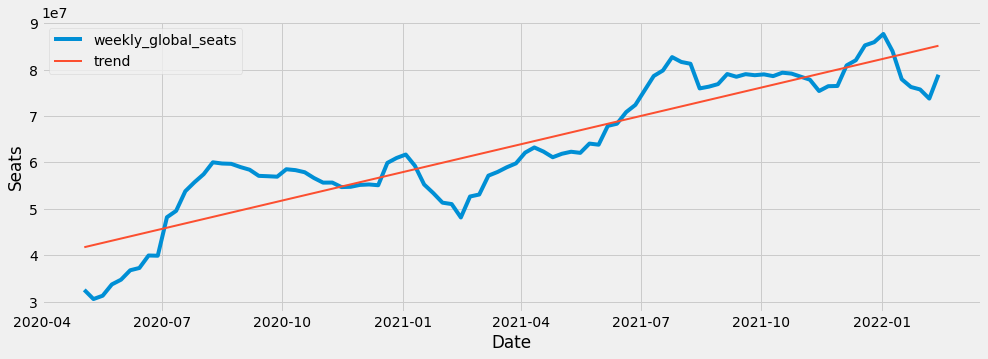

In [21]:
crecimiento['fecha_numeros']=crecimiento.END.map(datetime.datetime.toordinal)

lr2 = LinearRegression()
lr2.fit(crecimiento.fecha_numeros.values.reshape(-1, 1), crecimiento.Seats)

plt.figure(figsize = (15,5))
plt.plot(crecimiento.END, crecimiento.Seats, label = 'weekly_global_seats')
plt.plot(crecimiento.END, lr2.predict(crecimiento.fecha_numeros.values.reshape(-1, 1)), lw = 2, label = 'trend')
plt.xlabel('Date')
plt.ylabel('Seats')
plt.legend()
plt.show()

In [22]:
print('pendiente de la regresión: ',lr2.coef_)

pendiente de la regresión:  [66677.0747999]


El modelo muestra un crecimiento positivo a partir del 2020-04, debido la vacunación y a un manejo adecuao de la reactivación económica

### Predicción de modelos

Se propone utilizar los datos del ultimo crecimiento, con el fin de identificar el crecimiento futuro que puede llegar a tener el sector en el próximo año

### Multi-Step Time Series Forecasting

Cuando se usan las series de tiempo se predice un punto alejado en el tiempo (t+n).  
se pretende predecir, modelo de multistep forecasting requiere que por cada predicción anterior se hará la siguiente, para así tener un consolidados a futuro

In [23]:
from sklearn.linear_model import Ridge
from lightgbm import LGBMRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

In [24]:
crecimiento['END'] = pd.to_datetime(crecimiento['END'], format='%Y-%m-%dT%H:%M:%SZ')
crecimiento = crecimiento.set_index('END')
crecimiento = crecimiento.sort_index()

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_26336/297746525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crecimiento['END'] = pd.to_datetime(crecimiento['END'], format='%Y-%m-%dT%H:%M:%SZ')


In [25]:
crecimiento = crecimiento.drop(columns=['START','fecha_numeros'])
#crecimiento = crecimiento.resample(rule='H', closed='left', label ='right').mean()
crecimiento.tail()

,Seats
END,
2022-01-16,77942134
2022-01-23,76273044
2022-01-30,75737155
2022-02-06,73768296
2022-02-13,78908923


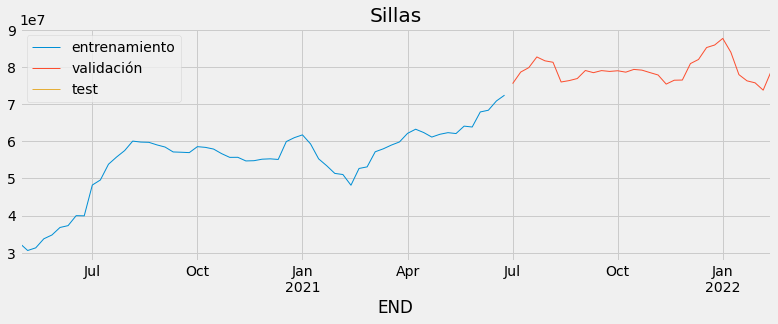

In [26]:
crecimiento = crecimiento.loc['2020-05-03': '2022-02-13']
t_train = '2021-07-03'
t_test = '2022-02-13'
datos_train = crecimiento.loc[: t_train, :]
datos_val   = crecimiento.loc[t_train:t_test, :]
datos_test  = crecimiento.loc[t_test:, :]

fig, ax = plt.subplots(figsize=(12, 4))
datos_train.Seats.plot(ax=ax, label='entrenamiento', linewidth=1)
datos_val.Seats.plot(ax=ax, label='validación', linewidth=1)
datos_test.Seats.plot(ax=ax, label='test', linewidth=1)
ax.set_title('Sillas')
ax.legend();

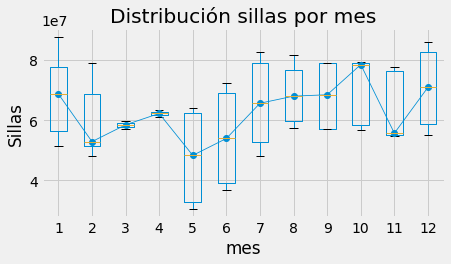

In [27]:
fig, ax = plt.subplots(figsize=(7, 3.5))
crecimiento['mes'] = crecimiento.index.month
crecimiento.boxplot(column='Seats', by='mes', ax=ax,)
crecimiento.groupby('mes')['Seats'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Sillas')
ax.set_title('Distribución sillas por mes')
fig.suptitle('');

Se encuentra una fuerte volatilidad en los datos por mes. Hay datos con un rango intercuartilico amplio como mayo junio, julio, ya que se supondría que hay un minimo y un máximo más fuerte durante estos periodos.  
En  mayo se encuentra el dato mas bajo y su punto mas alto en oscilación con la media.

### Predicción  
Hacer predicción sobre datos históricos genera una ventaja competitiva, ya que da información a los administradores, para estar previstos al futuro y tomar las mejores desiciones respecto a la competencia.  
Para poder pronosticar el futuro existen ciertos tipos de aprendizajes de maquina. Para cuestiones de este estudio se implementara un modelo autorregresivo.  
**Componentes de una serie temporal**  
Una serie temporal puede componerse de tres factores:  
> Tendencia: los movimientos de la serie, en sierto periodo de tiempo.  
> Estacionalidad: Variación estacional, es decir como se comporta la sere de tiempo segun siertos periodos de un año.  
> Ruido blanco:  Picos y valles de los intervalos aleatorios.  


Cuando intentamos hacer un modelo, buscamos la mayor estacionalidad. Cuando una serie temporal es estacionaria tiene un comportamiento similar durante un periodo de tiempo determinado, respecto a un periodo posterior.

**Modelos Autorregresivos**  
Estos modelos operan sobre la afirmación que los datos pasados tienen un efecto sobre los modelos futuros.  
**Modelo media movil**  
Supone que el valor de la variable dependiente en el dia presente, depende de los terminos de error de días anteriores
**ARMA**  
Es una combinación entre un modelo autorregresivo y de media movil  
**ARIMA**  
El modelo arima agrega un diferenciación para una transformación de la serie a estacionaria

Normalmente se utilizan tres números enteros (p, d, q) para parametrizar los modelos ARIMA.
+ p: número de términos autorregresivos (orden AR)
+ d: número de diferencias no estacionales (orden de diferenciación)
+ q: número de términos de media móvil (orden MA)

### Metodología Box Jenkins
**Decidir acerca de la transformación de la serie para que sea estacionaria** 
> Hacer gráfica de la serie  
Analizar los correlogramas ( Función de autocorrelación y autocorrelación parcial)  
Test de Dicky-Fuller

Existen formas para transformar una serie estacional las cuales se aplicaran el modelo:  
+ La diferencia (Resta la variable z = (yt -(yt-1))
+ Transformación logaritmica  
+ La diferencia del logaritmo  
Sarima predice todo lo que de forma lineal, se puede utilizar el pasado para explicar el futuro

**Función de correlación automática (ACF)**
La correlación entre las observaciones en el momento actual y las observaciones en todos los momentos anteriores . Podemos usar ACF para determinar el número óptimo de términos MA . El número de términos determina el orden del modelo.

#### **Función de correlación automática parcial (PACF)**
Como su nombre lo indica, PACF es un subconjunto de ACF. PACF expresa la correlación entre las observaciones realizadas en dos puntos en el tiempo y tiene en cuenta cualquier influencia de otros puntos de datos. Podemos usar PACF para determinar la cantidad óptima de términos para usar en el modelo AR . El número de términos determina el orden del modelo.

### Validación de estacionalidad

Hay dos formas de validar que un modelo sea estacionario.  
> **Estadísticas moviles**: al trazar una media movil y una desviación estandar movil, la serie temporal se comportará constante en el tiempo.  
> **Prueba de Dickey-Fuller**: se considera la serie temporal estacionaria si el valor de p es bajo. y los valores criticos de los intervalos de confianza 1%,5% y 10% estan lo más serca que las estadisticas ADF

In [28]:
fore = global_seat[global_seat.END>='2020-05-01']

In [29]:
fore.set_index('END',inplace=True)

In [30]:
fore = fore[['Seats']]

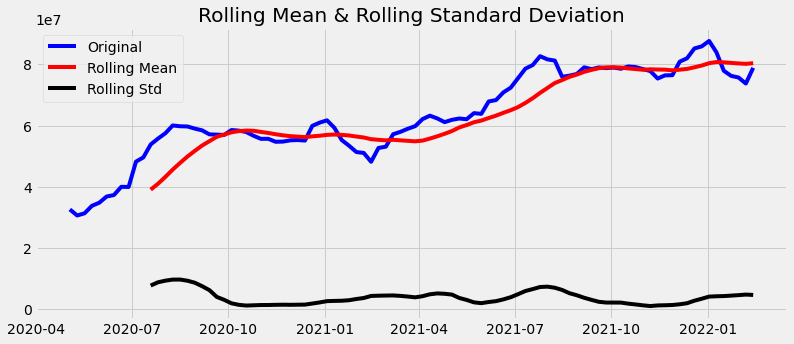

In [31]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

rolling_mean = fore.rolling(window = 12).mean() 
rolling_std = fore.rolling(window = 12).std()

plt.figure(figsize =(12,5))
plt.plot(fore, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

la media movil y la serie aumentan con el tiempo por lo cual no es estacional

In [32]:
result = adfuller(crecimiento['Seats'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))


ADF Statistic: -1.8280071673394191
p-value: 0.36664821273467374
Critical Values:
	1%: -3.505190196159122
	5%: -2.894232085048011
	10%: -2.5842101234567902


El p valor esta alejado del humbral 0.05, y el ADF esta elejado de los puntos criticos, por lo cual se confirma que no es estacionaria

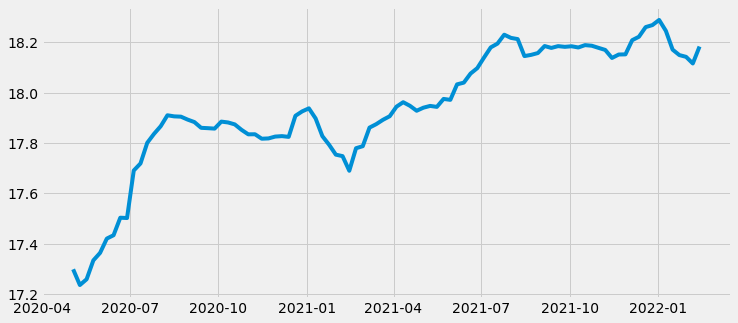

In [33]:
plt.figure(figsize =(11,5))
df_log = np.log(fore)
plt.plot(df_log)
plt.show()

Aplicaremos transformaciones matematicas para determiar la estacionalidad de la serie

In [34]:
def get_stationarity(timeseries):
    
    
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    
    result = adfuller(timeseries['Seats'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

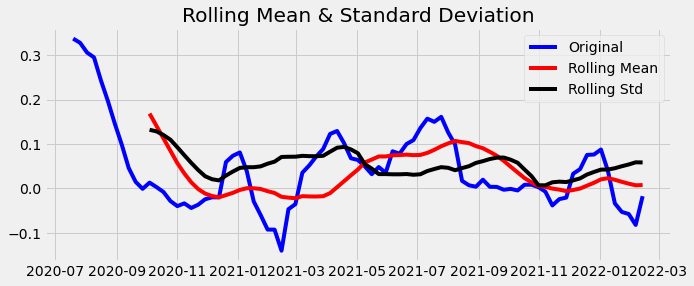

ADF Statistic: -4.648345799989089
p-value: 0.00010510764184160072
Critical Values:
	1%: -3.5148692050781247
	5%: -2.8984085156250003
	10%: -2.58643890625


In [35]:
plt.figure(figsize =(10,4))
rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

Se obseva un comportamiento de la media y desviación estandar es relativamente horizontal y el p valor se encuentra por debajo de 0.05. por lo tanto la serie es estacionaria. 

**Decaimiento exponencial**

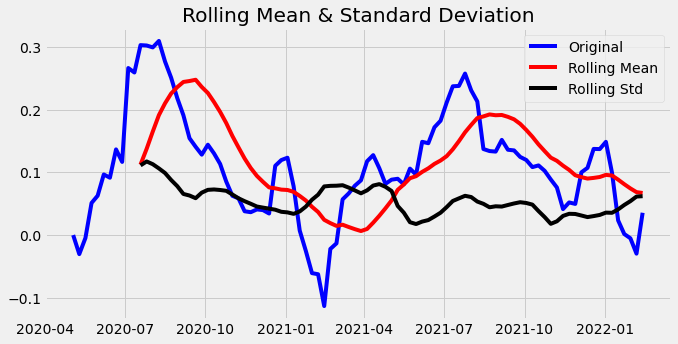

ADF Statistic: -2.934870852580072
p-value: 0.04144067119504223
Critical Values:
	1%: -3.505190196159122
	5%: -2.894232085048011
	10%: -2.5842101234567902


In [36]:
plt.figure(figsize =(10,5))
rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean() 
df_log_exp_decay = df_log - rolling_mean_exp_decay 
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)

Eeste metodo muestr que el ADF se acerca más a los puntos citicos sin embargo la otra serie tiene una mejor estacionalidad

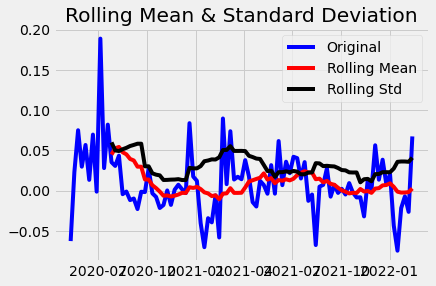

ADF Statistic: -4.209888674443374
p-value: 0.0006339593188919296
Critical Values:
	1%: -3.506057133647011
	5%: -2.8946066061911946
	10%: -2.5844100201994697


In [37]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

C:\ProgramData\Miniconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


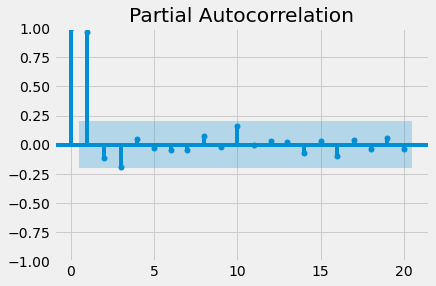

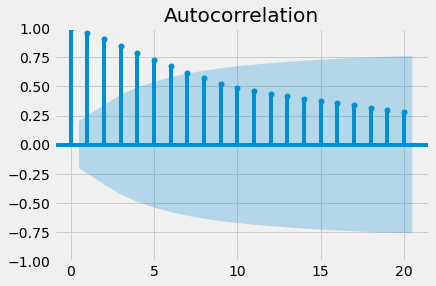

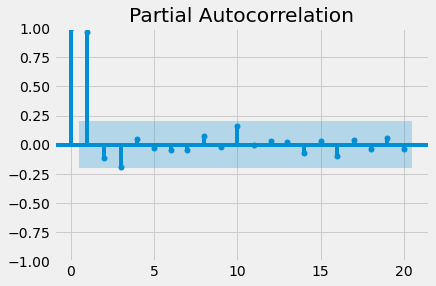

In [50]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(fore)
plot_pacf(fore)

In [49]:
from pandas.plotting import register_matplotlib_converters
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(fore['Seats'], order=(5,0,5))
results = model.fit(disp=-1)
print(results.summary())

C:\ProgramData\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Seats   No. Observations:                   94
Model:               SARIMAX(5, 0, 5)   Log Likelihood               -1497.358
Date:                Wed, 16 Feb 2022   AIC                           3016.716
Time:                        11:19:37   BIC                           3044.692
Sample:                    05-03-2020   HQIC                          3028.016
                         - 02-13-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0425      0.279     -3.739      0.000      -1.589      -0.496
ar.L2          0.0096      0.341      0.028      0.978      -0.659       0.678
ar.L3          0.6579      0.368      1.788      0.0

C:\ProgramData\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


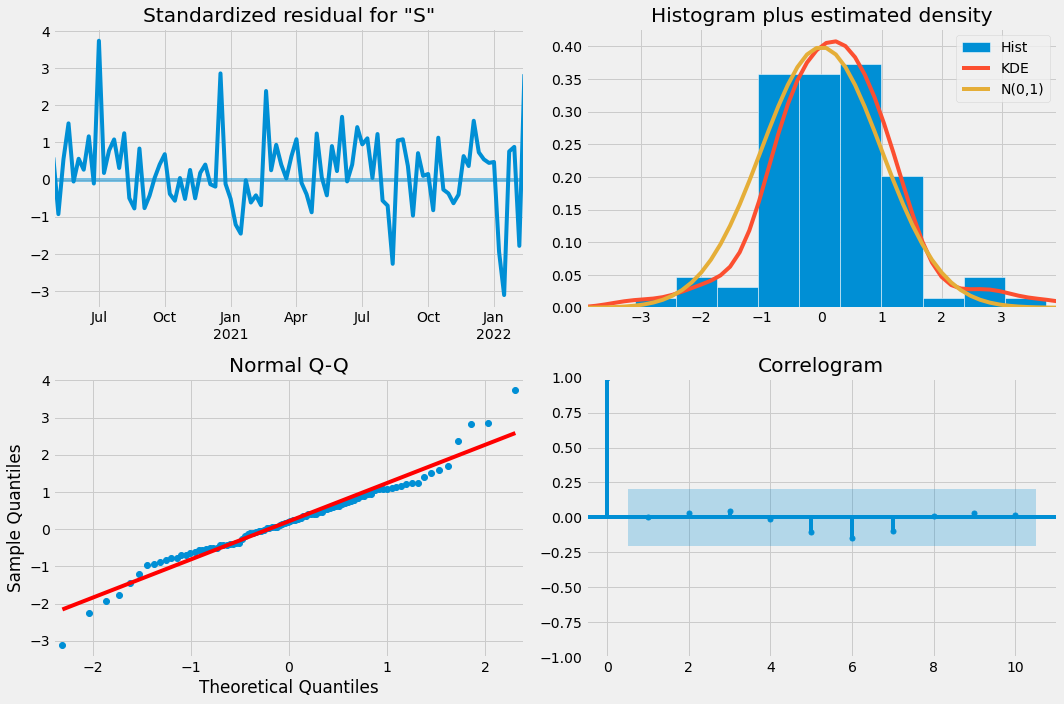

In [51]:
results.plot_diagnostics(figsize=(15,10))
plt.tight_layout()
plt.show()

Se pueden analizar los resultados por grafico, en el grafico 1 se observa que hay una oscilación sobre 0 lo cual estima un buen resultado del modelo.En el segundo grafico se muestra un asimetria en las dos distribuciones sin embargo una curtosis diferente, en Q normal los puntos trantan de ajustarce a la linea y por ultimo el correlogramo muestra los puntos ajstados a un intervalo de confianza

In [54]:
pred = results.get_prediction(start = 1,end = 117, dynamic=False)
pred_ci = pred.conf_int()

fc = results.predict(start = 1,end = 140)
fc_series = pd.Series(fc)


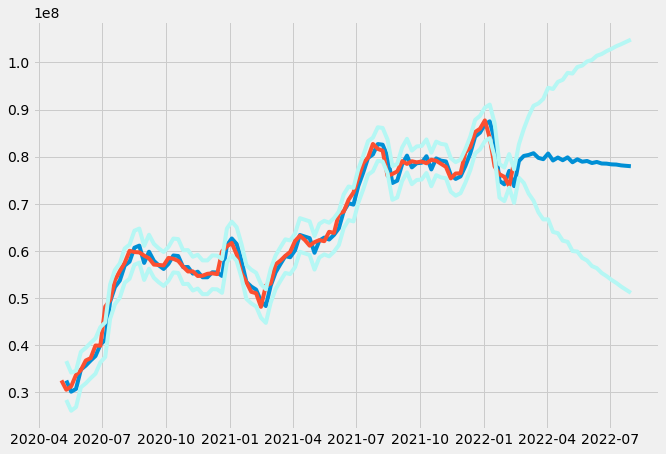

In [55]:
plt.figure(figsize = (10,7))
plt.plot((pred_ci['lower Seats']+pred_ci['upper Seats'])/2)
plt.plot(fore, label = 'Serie')
plt.plot(pred_ci['lower Seats'], color =  '#B5F7F4')
plt.plot(pred_ci['upper Seats'], color = '#B5F7F4')

In [43]:
pred_ci

,lower Seats,upper Seats
2020-05-10,2.834930e+07,3.671822e+07
2020-05-17,2.601860e+07,3.414400e+07
2020-05-24,2.685829e+07,3.438330e+07
2020-05-31,3.129774e+07,3.865036e+07
2020-06-07,3.231523e+07,3.965335e+07
...,...,...
2022-07-03,5.204634e+07,1.066672e+08
2022-07-10,5.110220e+07,1.071267e+08
2022-07-17,5.049634e+07,1.078647e+08
2022-07-24,4.957467e+07,1.082863e+08


In [44]:
look_back = 10

N = fore.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(83, 10) (83,)


In [45]:
N_train = 70 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test =  24#cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(60, 10) (60,)
(23, 10) (23,)


In [46]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
rf = KNeighborsRegressor(n_neighbors=10).fit(X_train,y_train)

y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

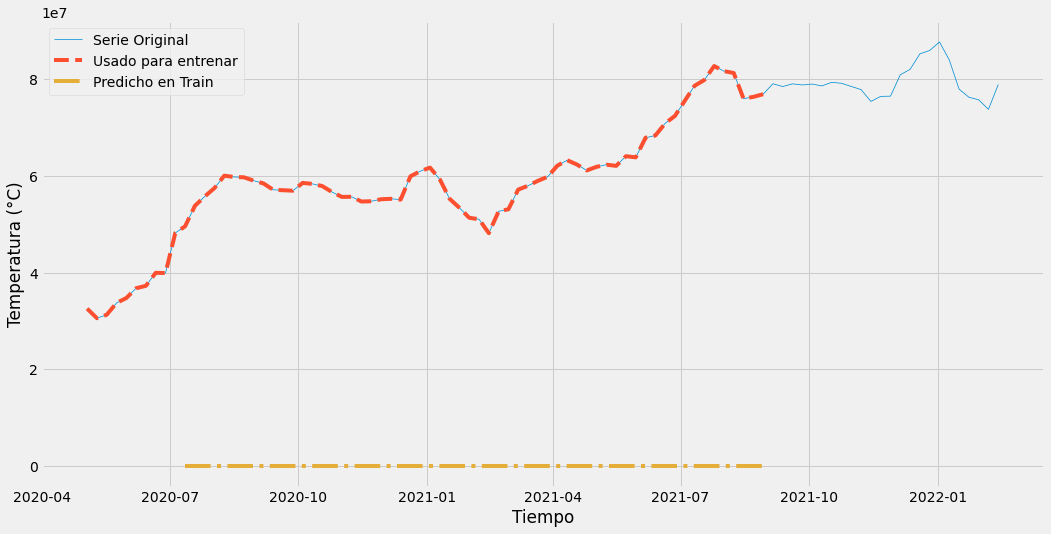

In [47]:
plt.figure(figsize=(16,8))
plt.plot(fore.index[:length_total], fore[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(fore.index[:N_train + look_back], fore[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(fore.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
#plt.plot(fore.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Temperatura (°C)')
plt.show()